# Nullpunktsmetoder - Forelesning 26.10.2023


Nullpunktsmetoder er teknikker i numerisk analyse og optimering som brukes for å finne røttene av en funksjon, altså de punktene der funksjonen krysser x-aksen (eller hvor funksjonen f(x) = 0). Dette er en viktig oppgave innen både ingeniørvitenskap, fysikk, økonomi og mange andre fagfelt.

De er et essensielt verktøy i økonomisk analyse og er mye brukt for å finne balansepriser, kvantiteter, og andre variabler som oppstår i økonomiske modeller. Disse metodene kan hjelpe oss med å forstå hvordan markeder fungerer, hvordan priser blir satt, og hva som skjer når det er endringer i forsynings- og etterspørselsforhold.

## Målet for denne forelesningen:

- Forstå hva nullpunktsmetoder er og hvordan de fungerer
- Forstå Biseksjonsmetoden og Newtons Metode
- Live-kode nullpunktsmetoder i Julia (mellom hver metode)
    - Biseksjonsmetoden
    - Newtons metode
- Kahoot! (med premie!)

## Biseksjonsmetoden (Bisection Method)

Biseksjonsmetoden er en av de enkleste nullpunktsmetodene. Den er basert på Bolzanos teorem, som sier at hvis en kontinuerlig funksjon $f(x)$ har to verdier $f(a)$ og $f(b)$ som har motsatt fortegn, så må det finnes minst ett nullpunkt mellom $a$ og $b$.

> Bolzanos teorem er også kjent som [Intermediate Value Threorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem).



### Biseksjonsmetoden Video

In [20]:
using ShortCodes
YouTube("MlP_W-obuNg")

https://www.youtube.com/watch?v=MlP_W-obuNg&start=0

### Så hvordan fungerer Bisection Metoden?

La oss si vi har en funksjon $f(x)$ som vi ønsker å finne nullpunktet til. Vi må først sjekke om det er et nullpunkt mellom $a$ og $b$. Vi kan gjøre dette ved å sjekke om $f(a)$ og $f(b)$ har motsatt fortegn. Hvis de har det, så vet vi at det er et nullpunkt mellom $a$ og $b$.

*Hvordan kan vi sjekke om de har motsatt fortegn?*

> Hint: $f(a)$ betyr å evaluere funksjonen $f(x)$ ved $x = a$. Det vil si at $y = f(a)$ (et tall).

> Eksempel: $f(x) = x^2 + 2x + 1$, $f(2) = 2^2 + 2(2) + 1 = 9$.


Svar: Vi kan sjekke om $f(a) \cdot f(b) < 0$. Hvis det er tilfelle, så har de motsatt fortegn. Hvis ikke, så har de samme fortegn. Fordi $f(a)$ og $f(b)$ er tall, så kan vi sjekke om de har motsatt fortegn ved å sjekke om produktet av dem er negativt.

Deretter kan vi finne nullpunktet ved å gjøre følgende:

1. Finn midtpunktet $c$ mellom $a$ og $b$. Dette gjør vi ved å regne ut $c = \frac{a + b}{2}$.


> Hvorfor velger vi midtpunktet? Hvorfor ikke et annet punkt mellom $a$ og $b$? 

> Svar: Det er mange grunner. Enkelhet, Symmetri, Garantert Konvergens, Robusthet, osv.

  2. Sjekk om $f(c)$ er et nullpunkt. Hvis det er det, så er vi ferdige. Hvis ikke, så gå til steg 3.

  3. Sjekk om $f(a)$ og $f(c)$ har motsatt fortegn. Hvis de har det, så vet vi at det er et nullpunkt mellom $a$ og $c$. Hvis ikke, så vet vi at det er et nullpunkt mellom $c$ og $b$.

  4. Gjenta prosessen med det nye intervallet. Det vil si, hvis det er et nullpunkt mellom $a$ og $c$, så setter vi $b = c$ og går tilbake til steg 1. Hvis det er et nullpunkt mellom $c$ og $b$, så setter vi $a = c$ og går tilbake til steg 1.

  5. Gjenta prosessen til du har funnet nullpunktet med ønsket nøyaktighet, eller til du har nådd maksimalt antall iterasjoner.

#### **Hva mener vi med ønsket nøyaktighet?**

Vi kan ikke finne det eksakte nullpunktet til en funksjon numerisk. Vi kan bare finne en tilnærming til nullpunktet. Vi kan derfor definere en feilmargin $\epsilon$ som sier hvor nøyaktig vi ønsker at tilnærmingen skal være. For eksempel, hvis vi setter $\epsilon = 0.0001$, så betyr det at vi ønsker at tilnærmingen skal være innenfor 0.0001 av det faktiske nullpunktet.

**Hvordan sjekker vi at tilnærmingen er innenfor feilmarginen?**

Vi kan sjekke om $|f(c)| < \epsilon$. Hvis det er tilfelle, så er vi ferdige. Hvis ikke, så fortsetter vi å iterere.

$f(x) = x^3 - x -2$

| Iteration |   aₙ   |   bₙ   |   cₙ   |    f(cₙ)   |
|----------|--------|--------|--------|------------|
| 1        | 1      | 2      | 1.5    | -0.125     |
| 2        | 1.5    | 2      | 1.75   | 1.6093750  |
| 3        | 1.5    | 1.75   | 1.625  | 0.6660156  |
| 4        | 1.5    | 1.625  | 1.5625 | 0.2521973  |
| 5        | 1.5    | 1.5625 | 1.53125| 0.0591125  |
| 6        | 1.5    | 1.53125| 1.515625|-0.0340538 |
| 7        | 1.515625|1.53125| 1.5234375|0.0122504 |
| 8        | 1.515625|1.5234375|1.5195313|-0.0109712|
| 9        | 1.5195313|1.5234375|1.5214844|0.0006222 |
| 10       | 1.5195313|1.5214844|1.5205078|-0.0051789|
| 11       | 1.5205078|1.5214844|1.5209961|-0.0022794|
| 12       | 1.5209961|1.5214844|1.5212402|-0.0008289|
| 13       | 1.5212402|1.5214844|1.5213623|-0.0001034|
| 14       | 1.5213623|1.5214844|1.5214233|0.00002594|
| 15       | 1.5213623|1.5214233|1.5213928|0.00000780 |


### Psuedokode for Biseksjonsmetoden

> **Hva er Psuedokode?**

> Svar: Psuedokode er en enkel måte å representere en algoritme på, uten å bruke et spesifikt programmeringsspråk. Det er designet for å være leselig og forståelig for mennesker, og ikke for datamaskiner. Det er en slags blanding av vanlig språk og programmeringsspråk.

Dere må være i stand til å tolke psuedokode.



``` 
// Bisection Method Pseudocode

// Input: Function f(x), initial interval [a, b], tolerance tol, max iterations max_iter
// Output: Approximate root c within tolerance tol

1.  Initialize iteration counter n = 0
2.  Calculate f(a) and f(b)
3.  Check if f(a) * f(b) > 0
      - If true, print "No root in [a, b]" and exit
4.  While n < max_iter
      4.1  Increment iteration counter: n = n + 1
      4.2  Calculate midpoint: c = (a + b) / 2
      4.3  Calculate f(c)
      4.4  If |f(c)| < tol
            - Root found: print c and exit
      4.5  Update interval [a, b]
            - If f(a) * f(c) < 0 then b = c
            - Else a = c
5.  Print "Max iterations reached, approximate root is", c

``` 

### Julia kode for Bisection Metoden

In [14]:
function bisect(f, a, b, tol=1e-6, maxiter=1000)
    if f(a)*f(b) > 0
        error("f(a) og f(b) må ha forskjellige fortegn")
    end
    iter = 0
    while iter < maxiter
        c = (a+b)/2
        if abs(f(c)) < tol
            return c
        end
        if f(a)*f(c) < 0
            b = c
        else
            a = c
        end
        iter += 1
    end
end

bisect (generic function with 3 methods)

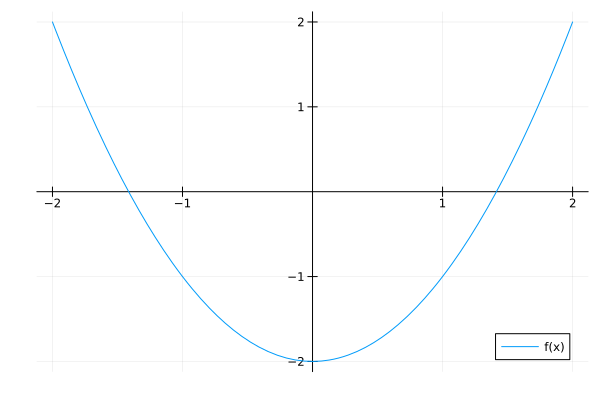

In [10]:
# Bruke bisect til å finne nullpunkt til f(x) = x^2 - 2
# La oss først se på grafen til f(x)
using Plots

f(x) = x^2 - 2

plot(f, -2, 2, label="f(x)", framestyle= :origin) # framestyle = :origin for å få med x- og y-aksen rundt 0

# Visuelt kan vi se at nullpunktet til f(x) = x^2 - 2 er ca. 1.4 på intervallet [0, 2]


In [18]:
# Vi kan bruke bisect til å finne nullpunktet til f(x) = x^2 - 2
# bisect(f,-2,2) # dette vil gi en feilmelding fordi f(-2) og f(2) har samme fortegn

In [16]:
nullpunkt = bisect(f,0,2) # vi vet at nullpunktet ligger på intervallet [0, 2]

1.4142136573791504

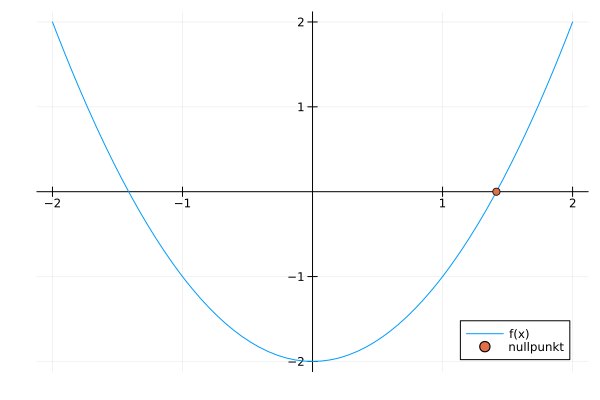

In [17]:
# Vi kan sjekke at nullpunktet er riktig ved å plotte f(x) og nullpunktet
plot(f, -2, 2, label="f(x)", framestyle= :origin)
scatter!([nullpunkt], [0], label="nullpunkt")

## Newton-Rhapson-Metode (Newton's Method)

[Newtons metode](https://en.wikipedia.org/wiki/Newton's_method) er en annen nullpunktsmetode. Mens biseksjonsmetoden er en "brute force"-tilnærming som progressivt innsnevrer intervallet der nullpunktet befinner seg, bruker Newtons metode informasjon om funksjonens derivat for å finne en bedre tilnærming til nullpunktet i hvert steg. Dette kan føre til raskere konvergens mot det faktiske nullpunktet.

Forestill deg at du er på en fjellklatretur. Du er på jakt etter det laveste punktet i en dal. I biseksjonsmetoden går du frem og tilbake, sjekker høyden, og tar deretter et gjennomsnittlig steg for å se om du har nådd lavere grunn. Du er sikker på at du vil nå bunnen til slutt, men det tar tid.

I Newtons metode tar du derimot ut en kikkert og ser på hellingen der du står. Du bruker denne informasjonen til å ta et mer informert steg mot bunnen av dalen. Så i prinsippet bruker du mer av den tilgjengelige informasjonen for å gjøre et mer nøyaktig steg.

Derfor, i mange tilfeller, kan Newtons metode være betydelig raskere enn biseksjonsmetoden. Men det er en hake: Newtons metode er ikke alltid garantert å konvergere. Avhengig av hvor du starter og hvordan funksjonen er formet, kan du ende opp med å gå i sirkler eller til og med divergere vekk fra nullpunktet.

Så, i et nøtteskall: Newtons metode er som å være en smart fjellklatrer som bruker all tilgjengelig informasjon for å finne den raskeste veien ned, mens biseksjonsmetoden er som å følge en fast, men treg, rute til bunnen

### Newtons Metode Video

In [21]:
YouTube("-RdOwhmqP5s")

https://www.youtube.com/watch?v=-RdOwhmqP5s&start=0

### Hvordan fungerer Newtons Metode?

La oss si vi har en funksjon $f(x)$, det vi må begynne med først er å finne den deriverte $f'(x)$. 

> Hvorfor må vi finne den deriverte?

> Svar: Fordi Newtons metode er basert på å finne nullpunktet til tangenten til funksjonen. Tangenten til en funksjon er gitt ved den deriverte av funksjonen. Ved å bruke tangenten til funksjonen, kan vi finne et punkt på x-aksen som er nærmere nullpunktet enn det vi startet med.

Stigningstallet $f′(c)$ forteller oss i hvilken retning, og med hvor stor "kraft," vi skal justere vår nåværende gjetning $x_n$ for å nærme oss roten. Hvis $f′(x_n)$ er stor, betyr det at funksjonen er ganske bratt på det punktet, og vi tar en relativt liten justering. Hvis $f′(c)$ er liten, er funksjonen flatere, og vi tar en større justering.

Så, den deriverte i Newtons metode gir oss et kraftig verktøy for å "styres" mot roten vi søker, basert på lokal informasjon om funksjonen. Uten den deriverte ville vi mangle det kritiske elementet som tillater oss å gjøre denne justeringen på en informert måte.

I Newtons metode så starter du på et tilfeldig punkt $x_0$ og finner tangenten til funksjonen i det punktet. Deretter finner du nullpunktet til tangenten, og bruker det som ditt neste gjett. Du gjentar denne prosessen til du har funnet nullpunktet med ønsket nøyaktighet, eller til du har nådd maksimalt antall iterasjoner.

Når du står ved et punkt $x_n​$ på funksjonen $f(x)$, kan du tenke på tangenten som en enkel, rett linje som "best gjettet" hvordan funksjonen oppfører seg i nærheten av det punktet. Nullpunktet til denne tangenten er det punktet der denne rette linjen krysser x-aksen. Dette er viktig fordi det gir en indikasjon på i hvilken retning og hvor langt vi skal "bevege oss" for å nærme oss funksjonens faktiske nullpunkt.

Det vil si at neste gjett $x_{n+1}$ er gitt ved:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

Dette er en veldig viktig formel, så la oss se på den litt nærmere.

$x_{n+1}$ er det neste gjettet vårt. Det er det punktet vi tror er nærmest nullpunktet. Vi finner det ved å ta det forrige gjettet $x_n$ og trekke fra forholdet mellom $f(x_n)$ og $f'(x_n)$.

$f(x_n)$ er verdien til funksjonen $f(x)$ ved $x = x_n$. Det er altså høyden til funksjonen ved $x_n$.

$f'(x_n)$ er verdien til den deriverte $f'(x)$ ved $x = x_n$. Det er altså stigningstallet til funksjonen ved $x_n$.

Forholdet mellom $f(x_n)$ og $f'(x_n)$ er altså forholdet mellom høyden til funksjonen og stigningstallet til funksjonen ved $x_n$. Dette er altså hvor langt vi skal bevege oss langs x-aksen for å nærme oss nullpunktet.

Man fortsetter med dette til man har nådd maksimal antall iterasjoner, eller nådd en toleransegrense, eller så kan man også se på toleransegrensen for forskjell i x verdier.

Altså $|x_{n+1} - x_n| < \epsilon$.

### Psuedokode for Newtons metode

```
// Newton's Method Pseudocode

// Input: Function f(x), its derivative f'(x), initial guess x0, tolerance tol, max iterations max_iter
// Output: Approximate root x within tolerance tol

1.  Initialize iteration counter n = 0
2.  Initialize current guess x = x0
3.  Calculate f(x) and f'(x)

4.  While n < max_iter
      4.1  Increment iteration counter: n = n + 1
      4.2  Update x using Newton's formula: x_new = x - f(x) / f'(x)
      4.3  Calculate f(x_new)
      4.4  If |f(x_new)| < tol
            - Root found: print x_new and exit
      4.5  Update x: x = x_new
      4.6  Calculate f(x) and f'(x) for the next iteration
      
5.  Print "Max iterations reached, approximate root is", x

```


### Julia Kode for Newton Metoden

In [2]:
function newtonrhapson(f,df,x_init,tol=1e-6,max_iter=1000)
    x = x_init
    iter = 0
    while iter < max_iter
        x = x - f(x)/df(x)
        if abs(f(x)) < tol
            return x
        end
        iter += 1
    end
end

newtonrhapson (generic function with 3 methods)

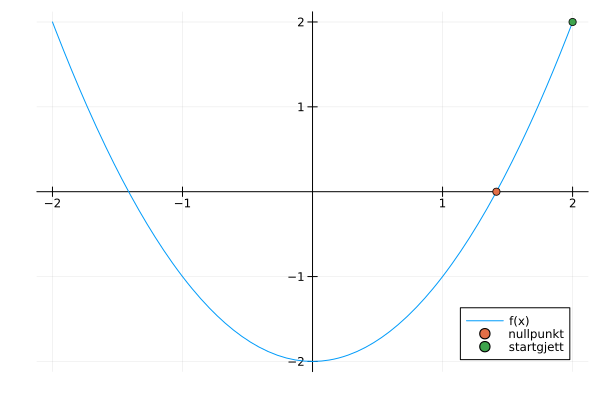

In [22]:
# Bruke newtonrhapson til å finne nullpunkt til f(x) = x^2 - 2

f(x) = x^2 - 2
df(x) = 2x # f'(x) = 2x

nullpunkt = newtonrhapson(f,df,2) # Startgjettet x_init = 2, prøv gjerne med andre startgjett

plot(f, -2, 2, label="f(x)", framestyle= :origin)
scatter!([nullpunkt], [0], label="nullpunkt")
scatter!([2], [f(2)], label="startgjett")

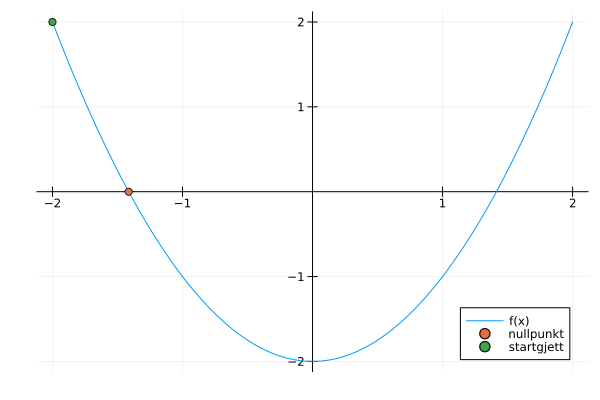

In [25]:
# Hvis vi prøver med et annet startgjett, f.eks. x_init = -2, vil vi få et annet nullpunkt fordi newtonrhapson er sensitiv til startgjettet og kan konvergere mot forskjellige nullpunkt avhengig av startgjettet

nullpunkt = newtonrhapson(f,df,-2) # Startgjettet x_init = -2, prøv gjerne med andre startgjett

plot(f, -2, 2, label="f(x)", framestyle= :origin)
scatter!([nullpunkt], [0], label="nullpunkt")
scatter!([-2], [f(-2)], label="startgjett")

# Økonomisk Optimering ved Hjelp av Rotfinningsmetoder

## Introduksjon

Du har nylig startet et lite foretak, og har fastslått at kostnadsfunksjonen $K(x)$  for produksjon av $x$ enheter av et produkt er gitt ved:

$$
K(x) = 3x^3 - 5x^2 + 6x - 7
$$
Din økonomiske rådgiver har foreslått å finne nullpunktene til denne funksjonen for å identifisere noen nøkkelpunkter som kan være relevant for bedriftens drift.

## Oppgaver

### Del 0: Forberedelser

1. Utvid Bisection-metoden og Newtons metode til å returnere antall iterasjoner som kreves for å finne en tilnærming til nullpunktet med ønsket nøyaktighet.
2. Utvid Bisection-metoden og Newtons metode med kommentarer som forklarer hva hver linje med kode gjør.
3. Skriv Bisection-metoden og Newtons metode med for-loop istedenfor while-loop.

### Del 1: Bisection-metoden

1. Skriv en funksjon i Julia som bruker bisection-metoden for å finne en rot av kostnadsfunksjonen $K(x)$. 
2. Verifiser at funksjonen fungerer ved å teste den med kjente verdier.
3. Anvend funksjonen for å finne en rot av $K(x)$.

### Del 2: Newtons metode

1. Skriv en annen funksjon i Julia som bruker Newtons metode for å finne en rot av kostnadsfunksjonen $K(x)$.
2. Verifiser at funksjonen fungerer ved å teste den med kjente verdier.
3. Anvend funksjonen for å finne en rot av $K(x)$.

### Sammenligning:

1. Sammenlign de to metodene. Hvilken metode konvergerer raskest?
2. Diskuter fordeler og ulemper ved hver av metodene i denne spesifikke situasjonen.
3. Hvilke andre faktorer bør tas i betraktning når du velger en metode for å løse dette problemet?
4. Hvilke andre metoder kan brukes til å løse dette problemet? (Undersøk på egenhånd)


